# **MIE1513: Final Project**
### Submission date: April 20, 2020 at 23:59pm
### student name: Jianhui Li
### studnet number: 1002116907

-------------

## Academic Integrity Declaration:
In submitting this assessment, I confirm that my conduct during this project adheres to the Code of Behaviour on Academic Matters. I confirm that I have not acted in such a way that would constitute cheating, misrepresentation, or unfairness, including but not limited to, using unauthorized aids and assistance, impersonating another person, and committing plagiarism. I pledge upon my honour that I have not violated the Faculty of Applied Science & Engineering’s Honour Code during this assessment.

-------------


In [1]:
import pandas as pd
import numpy as np
import nltk  
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sys
import re
import html
import math
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import metrics

from warnings import filterwarnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline 

In [2]:
from sklearn.linear_model import LogisticRegression 
# from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier 
from  sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV


In [3]:
from scipy.sparse import csc_matrix,csr_matrix

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ljian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download("vader_lexicon")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment.util import *
from nltk.tag import PerceptronTagger

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ljian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ljian\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ljian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Progress bar
from tqdm import tqdm
from wordcloud import WordCloud

## Part 1: Data Loading

### (a) Load the provided dataset (reddit_data.json)

In [8]:
import pandas as pd

In [9]:
data_all = pd.read_json("reddit_data.zip", orient='records', lines=True)
data_all = data_all[["id", "author", "created_utc", "subreddit", "title", "num_comments", "score", "selftext", "url"]]

In [10]:
data_all.head(10)

,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,abcupx,WithGravy,1546300839,gaming,What are some game games to enjoy on a low-end...,31,3,Got a new laptop and want to enjoy some games ...,https://www.reddit.com/r/gaming/comments/abcup...
1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
2,abcv1a,[deleted],1546300892,worldnews,"India: Chinese woman, 25, on solo trip to Khaj...",13,23,,https://timesofindia.indiatimes.com/city/agra/...
3,abcv5v,Lucious-Lyon,1546300914,AskReddit,[Serious] American Liberals of Reddit: Without...,76,0,[removed],https://www.reddit.com/r/AskReddit/comments/ab...
4,abcv7f,sandollars,1546300923,worldnews,"According to the Fiji Government, the Australi...",21,13,,http://fijisun.com.fj/2019/01/01/vuniwaqa-prak...
5,abcv7e,RyanGwood12,1546300923,pics,Here’s a reminder to grab one of these for a b...,12,0,,https://i.redd.it/063lwxm0dp721.jpg
6,abcv8x,suen05csus,1546300931,gaming,Xbox 1 s controller not discovered via bluetoo...,7,3,Title says it all...\n\nXbox 1 s controller no...,https://www.reddit.com/r/gaming/comments/abcv8...
7,abcvch,chenryan3p1,1546300947,videos,Sexy girls roccckkk!!!!!,1,1,,https://youtu.be/TojAqA6MXfE
8,abcvdf,IAmNightbreed,1546300952,gaming,The local Walmart did not sell even one copy o...,24,43,,https://i.redd.it/30cad4s3dp721.jpg
9,abcvdx,UnsetTheMindset,1546300955,videos,2019 will be the year where baby yoga finally ...,12,0,,https://youtu.be/T7ihdsjIqhI


### (b)	Generate your unique subset of the data

**Make sure you update unique_string with your email address**

In [11]:
# DO NOT CHANGE THE FUNCTION BELOW
def getMySubreddits(data, my_str):
    assert my_str != "", "You must fill in your unique string"
    import random
    subreddits = sorted(data["subreddit"].unique().tolist())
    rng = random.Random(my_str)
    return rng.sample(subreddits, 4)

In [12]:
# Fill in your UofT email in the variable unique_string below
unique_string = "jianhui.li@mail.utoronto.ca" 
my_subreddits = getMySubreddits(data_all, unique_string)
print("My subreddits:", my_subreddits)

My subreddits: ['pics', 'funny', 'Fitness', 'technology']


In [13]:
data = data_all[data_all["subreddit"].isin(my_subreddits)]

In [14]:
data['title'].iloc[1]

'Here’s a reminder to grab one of these for a before bed/next morning hangover cure! (Preferred flavor btw)'

In [15]:
data=data.reset_index()

In [16]:
data

,index,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
0,1,abcuz2,mikebeingfrank,1546300881,pics,"In 1964, an average wage worker had to clock 8...",4,5,,https://i.redd.it/j6rqqthwcp721.jpg
1,5,abcv7e,RyanGwood12,1546300923,pics,Here’s a reminder to grab one of these for a b...,12,0,,https://i.redd.it/063lwxm0dp721.jpg
2,13,abcvty,popedotninja,1546301036,pics,My best photo of 2018!,5,5,,https://i.redd.it/nkcs1p8adp721.jpg
3,14,abcvv8,[deleted],1546301042,pics,Have a happy 2019 you sexy people!,3,46,[deleted],https://i.redd.it/kphnhymddp721.jpg
4,20,abcwfb,wearestardust24,1546301142,pics,Adult male polar bear. Photo: Paul Nicklen,4,69,,https://i.redd.it/jzyd4nhodp721.jpg
5,25,abcwz4,polyhedron_servent,1546301243,technology,bots are taking over,0,1,,https://emojipedia-us.s3.dualstack.us-west-1.a...
6,31,abcx8c,[deleted],1546301291,funny,When Krispy Kream is life.,8,0,[deleted],https://i.redd.it/we2ivogeyo721.jpg
7,32,abcx7w,[deleted],1546301310,funny,They started playing the wii sports theme at t...,10,7,[deleted],https://v.redd.it/3nafm4c0ep721
8,37,abcxpz,schwillster,1546301364,pics,Started bee keeping My Favorite 2018 shop of n...,4,21,,https://i.redd.it/bvxz0wlbep721.jpg
9,40,abcxql,[deleted],1546301367,technology,“Let’s just say every last molecule of you at ...,3,0,[deleted],https://brainworldmagazine.com/transposed-mind...


## Part 2: Exploratory Data Analysis 

Abstract: Each column(feature) in this data is visualized and analyzed. The raw text is cleaned, and wordcloud is used to show if text feature is informative for us to predict the subreddit topics. There is a very close correlation between num_comment and score. As a conclusion, there are three features are selected, which are num_comment, title and url.

### (a) identify the importance of each column

#### a. 1. Feature: selftext (bad indicator)
The columns selftext gives us too many empty values. After replaced the text 'deleted' and 'removed', there are more than 40000 empty values, which means this column is not a good selection as a feature for prediction due to too many missing data.

In [17]:
data['selftext'].replace('', np.nan, inplace=True)

In [18]:
data['selftext'].replace('[deleted]',np.nan,inplace=True)
data['selftext'].replace('[removed]',np.nan,inplace=True)

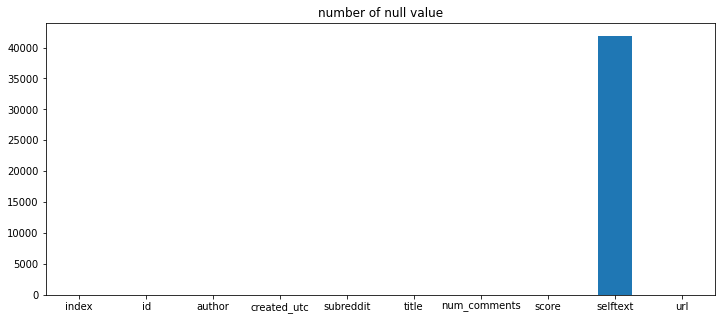

In [19]:
(data.isnull().sum()).plot.bar(x='type', y='number of null', rot=0,figsize=(12,5),title='number of null value')
plt.show()

#### a. 2. Feature: id (bad indicator)

The id is not eligible to be a feature for prediction. Because there are 42778 unique id in this dataset. And there are also 42778 posts in total. Therefore, the id doesn't give us any information related to the topics of subreddit. I choose to drop id.

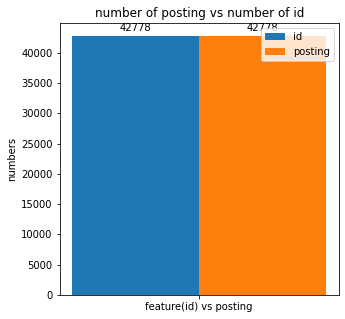

In [20]:
labels=['feature(id) vs posting']

num_id=data['id'].unique().shape[0]
num_posting=data.shape[0]


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(5,5))
rects1 = ax.bar(x - width/2, num_id, width, label='id')
rects2 = ax.bar(x + width/2, num_posting, width, label='posting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numbers')
ax.set_title('number of posting vs number of id')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()



#### a.3. Feature: author (bad indicator)
There are some author who is very productive and has a strong preference for
a specific topic of subreddit. From the posts, some authors like to post within a same subreddit. Therefore, some author are related to the subreddit. However, unique authors are 21891, and the total posting is 42778, which means some authors only have a post. It is hard to use author to predict the subreddit because only some authors can give us information. If we only select the authors who are informative as features, the model will become very overfit. So, the author is not eligible to be a good indicator compared to other columns.

In [21]:
data[data.duplicated(['author'])].sort_values("author").tail(5)

,index,id,author,created_utc,subreddit,title,num_comments,score,selftext,url
28561,156271,aipnl8,zsreport,1548180970,technology,How Geocities Suburbanized the Internet,2,2,NaN,https://www.citylab.com/life/2019/01/geocities...
20272,110694,agml7p,zukgotfuk,1547654741,funny,Itz the truth,7,31,NaN,https://i.redd.it/19a0btem6ta21.jpg
25949,142377,ai22rl,zwibele,1548016915,funny,Emplyee of the Month,16,628,NaN,https://v.redd.it/exor4n9b3nb21
26008,142762,ai2pqz,zwibele,1548020570,funny,The Purrfect Predator,13,278,NaN,https://v.redd.it/euhwthb8enb21
26037,142976,ai32si,zwibele,1548022695,funny,most powerful movie scene in cinema history,178,14966,NaN,https://v.redd.it/g28ujiifknb21


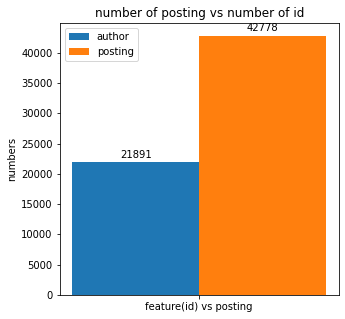

In [22]:
labels=['feature(id) vs posting']

num_id=data['author'].unique().shape[0]
num_posting=data.shape[0]


x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(5,5))
rects1 = ax.bar(x - width/2, num_id, width, label='author')
rects2 = ax.bar(x + width/2, num_posting, width, label='posting')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('numbers')
ax.set_title('number of posting vs number of id')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()




#### a.4. Feature: created_utc (bad indicator)

From the box chart, the posts of each topics have similar posting time range and similar posting time mean. Especially, the topic 'pics' and 'fitness' have almost same creating time range and mean of creating time. Therefore, the created_utc does not provide much information. 

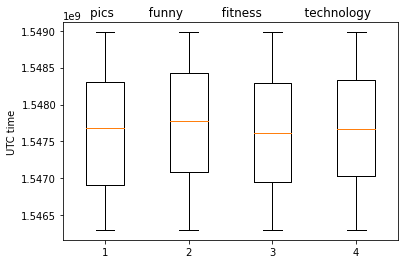

In [23]:

pics = data[data['subreddit']=='pics']['created_utc']
funny = data[data['subreddit']=='funny']['created_utc']
Fitness = data[data['subreddit']=='Fitness']['created_utc']
technology = data[data['subreddit']=='technology']['created_utc']


x = [pics,funny,Fitness,technology]
plt.figure()
plt.title('pics         funny          fitness           technology')
plt.ylabel('UTC time')
plt.ylabel('UTC time')
plt.boxplot(x)
plt.show()




#### a. 5. Feature: Number of Comments (good indicator)

The number of comments could be used as a feature to predict topics of subreddit. It is a good indicator of this classification task. The median except outliers is different of different topics. The mean value of number of comments also has much different. Besides, the number of comments gives different trend. From the box plot, we can find the topic 'funny' have higher number of comments than other topics. On the other hand, the technology topic has the lower number of comments. Therefore, we can get useful information to predict topics from number of comments 

number of comments mean of each topic, pics: 34.974563,funny: 52.318050, Fitness: 12.608197, technology: 12.483772


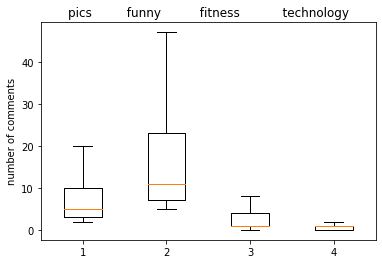

In [24]:

pics = data[data['subreddit']=='pics']['num_comments']
funny = data[data['subreddit']=='funny']['num_comments']
Fitness = data[data['subreddit']=='Fitness']['num_comments']
technology = data[data['subreddit']=='technology']['num_comments']

print('number of comments mean of each topic, pics: %f,funny: %f, Fitness: %f, technology: %f' %(pics.mean(),funny.mean(),Fitness.mean(),technology.mean()))
x = [pics,funny,Fitness,technology]

plt.figure()
plt.title('pics         funny          fitness           technology')
plt.ylabel('number of comments')
plt.boxplot(x,showfliers=False)
plt.show()


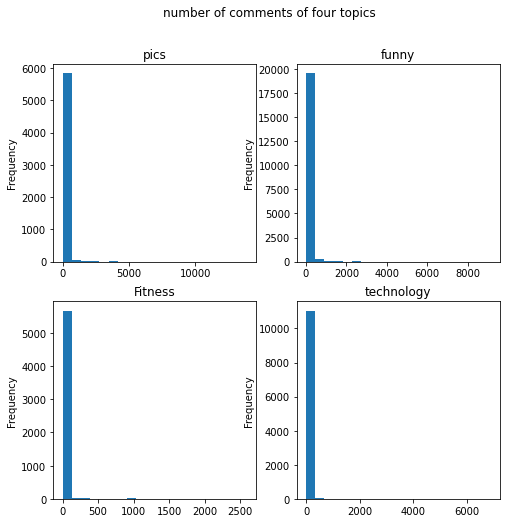

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
fig.suptitle('number of comments of four topics')
ax1.title.set_text('pics')
x = data[data['subreddit']=='pics']['num_comments']
x.plot.hist(bins=20,ax=ax1)
ax2.title.set_text('funny')
x = data[data['subreddit']=='funny']['num_comments']
ax2 = x.plot.hist(bins=20,ax=ax2)
ax3.title.set_text('Fitness')
x = data[data['subreddit']=='Fitness']['num_comments']
ax3 = x.plot.hist(bins=20,ax=ax3)
ax4.title.set_text('technology')
x = data[data['subreddit']=='technology']['num_comments']
ax4 = x.plot.hist(bins=20,ax=ax4)
plt.gca()



#### a.6 Feature: Score (good indicator)
Score could be used as a feature to predict topics of subreddit. It is a good indicator of this classification task. Like the number of comments, the median except outliers is different of different topics. The mean value also has much differency. From the box plot, we can find the topic 'funny' have higher score than other topics. On the other hand, the technology and fitness topics have the lower score. The trend is similar to number of comments. The correlation between each column will be calculated in the later step. Overall, we can get useful information to predict topics from score

mean of score of each topic, pics: 1123.575377,funny: 2002.125800, Fitness: 12.078673, technology: 164.729929


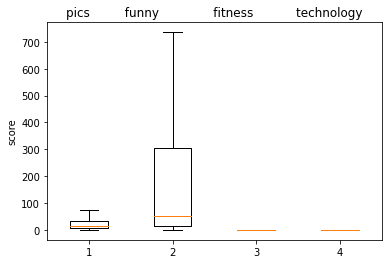

In [26]:

pics = data[data['subreddit']=='pics']['score']
funny = data[data['subreddit']=='funny']['score']
Fitness = data[data['subreddit']=='Fitness']['score']
technology = data[data['subreddit']=='technology']['score']

print('mean of score of each topic, pics: %f,funny: %f, Fitness: %f, technology: %f' %(pics.mean(),funny.mean(),Fitness.mean(),technology.mean()))

x = [pics,funny,Fitness,technology]
plt.figure()
plt.title('pics         funny              fitness           technology')
plt.ylabel('score')
plt.boxplot(x,showfliers=False)
plt.show()

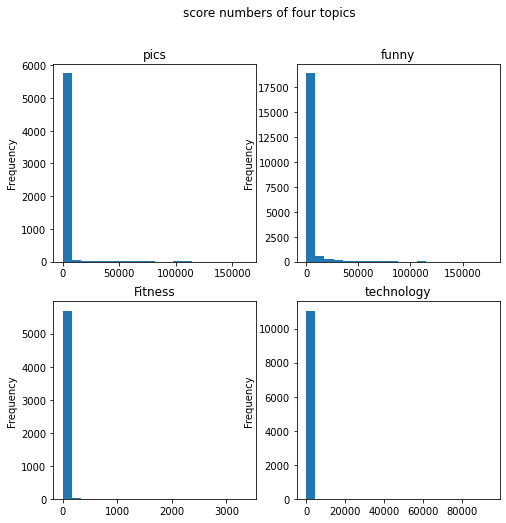

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
fig.suptitle('score numbers of four topics')

ax1.title.set_text('pics')
x = data[data['subreddit']=='pics']['score']
x.plot.hist(bins=20,ax=ax1)
x = data[data['subreddit']=='funny']['score']
ax2.title.set_text('funny')
ax2 = x.plot.hist(bins=20,ax=ax2)
x = data[data['subreddit']=='Fitness']['score']
ax3.title.set_text('Fitness')
ax3 = x.plot.hist(bins=20,ax=ax3)
x = data[data['subreddit']=='technology']['score']
ax4.title.set_text('technology')
ax4 = x.plot.hist(bins=20,ax=ax4)
plt.gca()


#### a. 7 Correlation of columns
In this dataset, the num_comments and score have very closed relationship. The correlation of num_comment and score is 0.75, which is a very high score, and also means they can be considered as redundant columns. In the next model train, only one of them is needed.

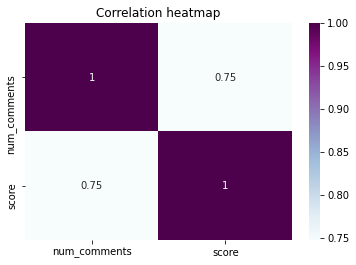

In [28]:
hm=data[['num_comments','score']].corr()
ax=sns.heatmap(hm,annot=True,cmap='BuPu')
ax.set(title="Correlation heatmap")
fig.set_size_inches(4,4)
plt.show()

### (b). Clean raw text (title and url)
Comments: As the raw data is very rough in terms of containing many random symbols such as dollar sign
($) and stars (*), I choose to remove them. Because the dollar sign, stars, and # are equally distributed in titles and url. In url, the ": //" are part of the links, which does not provided us any information related to the subreddit. Same as the title, these random signs are not related to any topic of subreddit. They are same as stopwords, which are meaningless for us.

In [29]:
def clean(string):
    term=re.sub(r'\s*(?:https?:\/\/)', ' ', string)
    #\s*(?:https?:\/\/)?[\w.-]+(?:\.[\w.-]+)+[\w\-._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+
#     \s*(?:https?:\/\/) remove https
    term=re.sub(r'\s*<.*?>',' ',term) #Remove html tags and attributes in form of <...>
#     term = re.sub("<'b\'>", "",term)# remove b\
    term=re.sub(r'[^\w]', ' ', term)
    # remove all the single character without A~z
#     term=re.sub("r'?[\w.-]+(?:\.[\w.-]+)+[\w\-._~:/?[\]@!\$&\'\(\)\*\+,;=.]+'"," ",term)
    term =re.sub(r'[\n\r\t]',' ',term)
    term =re.sub( r"[^\s\w]+",' ',term) # Remove non alphanumeric characters except space 
    term=re.sub(r'\w*[0-9]\w*',' ',term)
#     term=re.sub(r'\s[x][a-z\d]{2}', ' ', term)
    term = re.sub(r"(\s\d+)", ' ', term)  # remove pure numbers
    # remove the website link and URL
   
    return term
    

In [30]:
def clean_url(string):
    term=re.sub(r'\s*(?:https?:\/\/)', ' ', string)
    term=re.sub(r'www\S', '', term)
    term=re.sub(r'.com/', '', term)
    term=re.sub(r'[^\w]', ' ', term)
    term=re.sub(r'\w*[0-9]\w*',' ',term)
    return term

In [31]:
def remove_stopword(data):  
    words_rmStop = [word for word in data.split() if word not in stop_words]
    return words_rmStop

#### b.1 clean feature:  url

In [32]:
data['url_clean']=(data['url'].apply(clean_url)).apply(remove_stopword)


In [33]:
data['url_clean']=data['url_clean'].apply(lambda x: ' '.join(x))

#### b.2. Feature: url (good indicator)
The wordcloud plots demonstrate that the keywords from url in each topic of subreddit are very related to their subreddit. In topic'pics', there are keywords: jpg, img, pics. In topic 'funny', the results are similar to 'pics'. But in topic 'fitness', there is a very specific word 'Fitness'. And also in topic 'techonology', there is a keyword 'technology'. Therefore, the url is very informative to use, because the url almost expose which subreddit the posting belongs to.

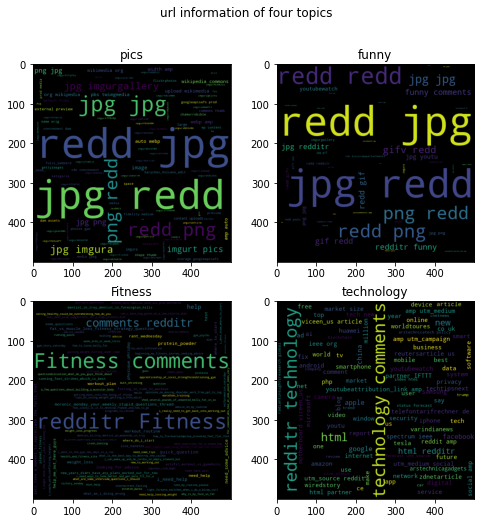

In [34]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
fig.suptitle('url information of four topics')

ax1.title.set_text('pics')
x = data[data['subreddit']=='pics']['url_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))
ax1.imshow(wordcloud)

x = data[data['subreddit']=='funny']['url_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))


ax2.title.set_text('funny')
ax2.imshow(wordcloud)
x = data[data['subreddit']=='Fitness']['url_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))


ax3.title.set_text('Fitness')
ax3.imshow(wordcloud)
x = data[data['subreddit']=='technology']['url_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))


ax4.title.set_text('technology')
ax4.imshow(wordcloud)
plt.gca()



#### b.3 clean feature: title

In [35]:

data['title_clean']=data['title'].str.lower()
# data['title_clean']=data['title_clean'].apply(replace_html)
data['title_clean']=data['title_clean'].apply(clean)
data['title_clean']=data['title_clean'].apply(remove_stopword)
data['title_clean']=data['title_clean'].apply(lambda x: ' '.join(x))

In [36]:
data['title_clean']

0        average wage worker clock hours afford program...
1        reminder grab one bed next morning hangover cu...
2                                               best photo
3                                        happy sexy people
4                 adult male polar bear photo paul nicklen
5                                              bots taking
6                                        krispy kream life
7           started playing wii sports theme bowling alley
8            started bee keeping favorite shop new friends
9        let say every last molecule moment somehow tra...
10                                             car problem
11                                           breaking news
12                      bionic construction workers coming
13       live brighton recently posted cats hanover fac...
14                           months glad went back shaving
15                                        found pokémon go
16                                             bots taki

#### b.4 Feature: title (good indicator)

Same as the analyzed results from url, the wordcloud of titles of posts also give us much useful information. The titles of topics 'Fitness' have unique keywords like workout, exercise,weight, and fitness. THe titles of topics technology have unique keywords including facebook ,apple, google and technology. These unique keywords are benefitial to train a machine learning model. However, the 'pics' and 'funny' have some same high frequency keyword. The reason could be that the topic pics and funny have something in common, for example, thing related to 'funny pics' could appear in both 'pics' and 'funny' subreddit.

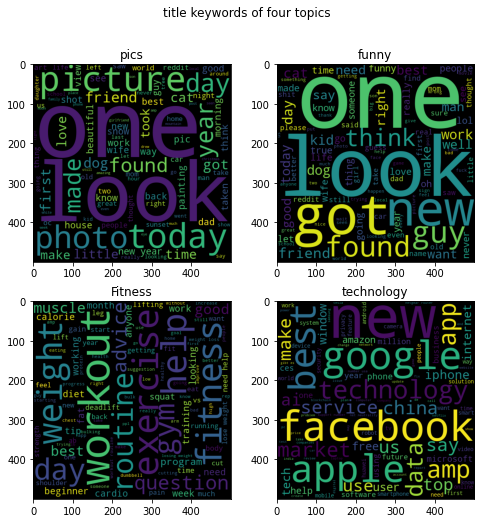

In [37]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
fig.suptitle('title keywords of four topics')

ax1.title.set_text('pics')
x = data[data['subreddit']=='pics']['title_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))
ax1.imshow(wordcloud)

x = data[data['subreddit']=='funny']['title_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))


ax2.title.set_text('funny')
ax2.imshow(wordcloud)
x = data[data['subreddit']=='Fitness']['title_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))


ax3.title.set_text('Fitness')
ax3.imshow(wordcloud)
x = data[data['subreddit']=='technology']['title_clean']
wordcloud = WordCloud(width = 500, height = 500, max_words=100, repeat=False).generate( ' '.join(map(str, x)))

ax4.title.set_text('technology')
ax4.imshow(wordcloud)
plt.gca()



### (c). Subreddit distribution - imbalance dataset
Through visulising the plot, the data is justified as imbalanced. The subreddit 'funny' has the most posts around half of the whole data, which is 20000. The subreddit 'pics' and 'fitness' have the least posts aorund 6000. Overall, the data is imbalanced, and we need to find a proper metric to evaluate the result.

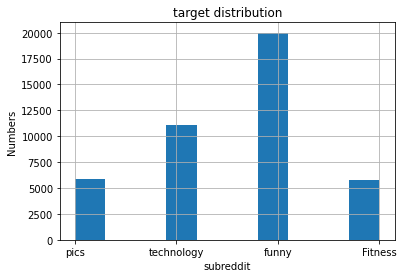

In [38]:
ax=data['subreddit'].hist()
ax.set_title("target distribution")
ax.set_ylabel("Numbers")
ax.set_xlabel("subreddit")
plt.show()

## Part 3: Classification

Abstract: From part 2, I decide to choose three feature set: url, title and num_comments. The text data are converted into vectors by two different method: TF-IDf, Term Frequency. Three classifiers are trained in this part, which are logistic regression, naive bayes classifier and random forest classifer. F1 score is the most suitable one, because of the imbalanced data.F1 score considers both the precision p and the recall r of the test to compute the score. Here, the F1 score is specified as macro-average which will compute the metric independently for each class and then take the average (hence treating all classes equally).Three classifers have been tuned with cross validation for better performance because some classifiers have random states. This three model are compared in a systematic way at last.



### (a) Generate dataset
The url and title columns are merged together as text data. The text data are converted into vectors of numbers by two different method: TF-IDf, and Term Frequency. After that, the chi2 score is calculated for each of the word columns to see which columns is suitable to keep to train models. Then, based on the chi2 score, the top 1000 words are selected to use in dataset. Here, not all the words appeared in titles are included in the dataset for train. Because random forest classifier has a lower speed. In order to save more time, the word columns with low information will be droped. 
    

#### a.1 Build tf_idf and term frequency function

In [39]:
def generate_tf_idf(dataFrame,feature_column,label_column,top):
    
    tfidf_vector = TfidfVectorizer(use_idf=True,stop_words='english', norm="l1",max_features=top,strip_accents='unicode')
    X = tfidf_vector.fit_transform(dataFrame[feature_column]).toarray()
    featureNames=tfidf_vector.get_feature_names()
    rawDF=pd.DataFrame(X,columns=featureNames)
    Y = dataFrame[label_column]
    return rawDF, Y

In [40]:
def generate_most_freq(dataFrame,feature_column,label_column,top):

    vectorizer = CountVectorizer(stop_words='english',max_features=top,strip_accents='unicode')
    X = vectorizer.fit_transform(dataFrame[feature_column]).toarray()
    featureNames=vectorizer.get_feature_names()
    rawDF=pd.DataFrame(X,columns=featureNames)
    Y = dataFrame[label_column]
    return rawDF, Y

#### a.2 Select word columns for machine learning model
First, the top 2000 words are generated. From the TF-IDF word chi2 score plot, the words' index within 1000 has a score value above 10. Too many words have score below 10. Therefore, the top 1000 words will be selected for future usage. As well seen from the TF word chi2 score plot, the line also drop dramatically until about 1000. Therefore, we can assume that the top 1000 words have more information to help us do the subreddit classification. Only choosing the necessary features can help us save more time in traning model

In [41]:
data['sample']=data['url_clean']+data['title_clean']

In [43]:
df_dataset_idf,df_target_idf=generate_tf_idf(data,'sample','subreddit',2000)
# add num_comments column to this dataset
df_dataset_idf['num_comments']= data['num_comments']
df_dataset_tf,df_target_tf=generate_most_freq(data,'sample','subreddit',2000)
df_dataset_tf['num_comments']= data['num_comments']


In [44]:
chi2_score=chi2(df_dataset_idf,df_target_idf)
colnames=df_dataset_idf.columns
df3=pd.Series(chi2_score[0],index=colnames)
df3.sort_values(axis=0, ascending=False, inplace=True)

chi2_score=chi2(df_dataset_tf,df_target_tf)
colnames=df_dataset_tf.columns
df4=pd.Series(chi2_score[0],index=colnames)
df4.sort_values(axis=0, ascending=False, inplace=True)


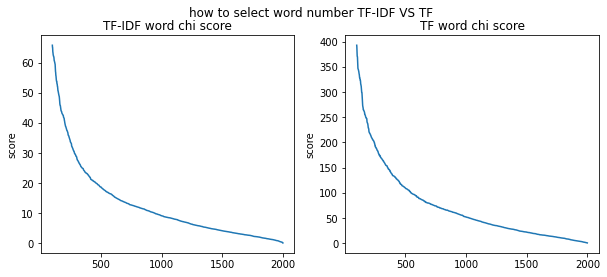

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('how to select word number TF-IDF VS TF')

ax1.plot(range(100,2000,1),df3[100:2000])

ax1.set_title('TF-IDF word chi score')
ax1.set_ylabel('score')

ax2.plot(range(100,2000,1),df4[100:2000])

ax2.set_title('TF word chi score')
ax2.set_ylabel('score')
plt.show()

#### a.3 Split data into train and test
Based on the analysis from a.2, the top 1000 words will be selected by using tfidf and tf encoding method. Then the num_comments column is added to the datasets. Here, the final datasets are ready to split into training data (70%) and test data (30%). The ratio 70:30 is usually an ideal ratio. The idea is that more training data is a good thing because it makes the classification model better while more test data makes the error estimate more accurate.

In [46]:
df_dataset_idf,df_target_idf=generate_tf_idf(data,'sample','subreddit',1000)
df_dataset_idf['num_comments']= data['num_comments']
df_dataset_tf,df_target_tf=generate_most_freq(data,'sample','subreddit',1000)
df_dataset_tf['num_comments']= data['num_comments']



In [47]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf= train_test_split(df_dataset_idf, df_target_idf, test_size=0.3, random_state=0)
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(df_dataset_tf, df_target_tf, test_size=0.3, random_state=0)

### (b) Implement machine learning classifiers

#### b.1 Choose classifier
Here, the multi-class classifiers are needed in this project. I use logistic regression classifier, naive bayes classifier and random forest classifier.

Logistic regression classifier is a simple algorithm that we can use as a performance baseline, it is easy to implement and it will do well enough in many tasks. Logistic Regression measures the relationship between the dependent variable and the one or more independent variables, by estimating probabilities using it’s underlying logistic function. Here, I will use the one-versus-all strategy in logistic regression classifier. The advantage of it is we can’t solve non-linear problems with logistic regression since it’s decision surface is linear,like XOR pattern.

Naive bayes classifier can give the conditional probability of each class for each x value. It has a higher speed for large numbers of training and queries. And also, it is less sensitive to missing data. However, there is an error rate in the classification decision. And it is very sensitive to the form of input data because it need to calculate the prior probability.

Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.But its algorithm is complex and waste much time in training.


#### b.2 Choose the Metrix

Here, I will list three metric: accuracy, F1 score and ROC AUC.

Accuracy as an evaluation metrics makes sense only if the class labels are uniformly distributed. Because it measures how many observations, both positive and negative, were correctly classified. However, in this project, the subreddit topic 'funny' takes up half of the dataset.

F1 score combines precision and recall into one metric by calculating the harmonic mean between those two. The additional reason to go with F1 is that these metrics are easier to interpret and communicate to business stakeholders.

ROC AUC compute Area Under the Receiver Operating Characteristic Curve from prediction scores. The ROC curve is a plot of the false positive rate (FPR) versus the true positive rate (TPR).It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). However, we don't care about ranking predictions. 

Therefore, F1 score is the most suitable metrix for this project. Due to our imbalanced data, I will choose 'macro average' F1 score, which  will compute the metric independently for each class and then take the average, hence treating all classes equally.

#### b.3 Tune hyperparameters for each classifier 

Here, I use grid search, and cross validation to tune hyperparameters for logsitic regression classifier, naive bayes classifier and random forest classifier. For logistic regression classifier, I tuned the penalty type, solver type and C(Inverse of regularization strength). For random forest classifier, I tuned the n_estimator which means the number of trees in the forest, and the number of features to consider when looking for the best split. For naive bayes classifier, only the alpha value needs to be tuned. The alpha value controls the affect of rare words.

In [48]:
penalty = ['l1','l2'] 
C = [ 0.01, 0.1, 1, 10, 100] # smaller values specify stronger regularization.
solver = ['liblinear','saga'] 
logistic = LogisticRegression(multi_class='ovr')
param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)
grid = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='f1_macro',
                    cv=10, verbose=0,n_jobs=-1)
grid_result = grid.fit(csr_matrix(X_train_tfidf), y_train_tfidf)
print('tfidf Best Score f1: ', grid_result.best_score_)
print('tfidf Best Params for logistic regression classifier: ', grid_result.best_params_)

tfidf Best Score f1:  0.7820676625989891
tfidf Best Params for logistic regression classifier:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [49]:
grid_result_tf = grid.fit(csr_matrix(X_train_tf), y_train_tf)
print('tf Best Score f1: ', grid_result_tf.best_score_)
print('tf Best Params for logistic regression classifier: ', grid_result_tf.best_params_)

tf Best Score f1:  0.7958333817175105
tf Best Params for logistic regression classifier:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [50]:
rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [50,100,200,300],  
    'max_features': ['auto','sqrt', 'log2'] 
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,scoring='f1_macro',cv=5)
CV_rfc.fit(csr_matrix(X_train_tfidf), y_train_tfidf)

print('tfidf Best Score f1: ', CV_rfc.best_score_)
print('tfidf Best Params for random forest classifier: ', CV_rfc.best_params_)

tfidf Best Score f1:  0.8843179262035776
tfidf Best Params for random forest classifier:  {'max_features': 'log2', 'n_estimators': 200}


In [51]:
CV_tf=CV_rfc.fit(csr_matrix(X_train_tf), y_train_tf)
print('tf Best Score f1: ', CV_tf.best_score_)
print('tf Best Params for random forest classifier: ', CV_tf.best_params_)

tf Best Score f1:  0.8825248918217088
tf Best Params for random forest classifier:  {'max_features': 'log2', 'n_estimators': 100}


In [52]:

clf=MultinomialNB()
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
param_grid = {'alpha': alphas, 'fit_prior' : [True, False]}


CV_nb = GridSearchCV(estimator=clf, param_grid=param_grid,scoring='f1_macro',cv=10)
CV_nb.fit(csr_matrix(X_train_tfidf), y_train_tfidf)

print('tf-idf Best Score f1: ', CV_nb.best_score_)
print('tf-idf Best Params for naive bayes classifier', CV_nb.best_params_)

tf-idf Best Score f1:  0.7526314878752596
tf-idf Best Params for naive bayes classifier {'alpha': 0.1, 'fit_prior': True}


In [53]:
CV_nb.fit(csr_matrix(X_train_tf), y_train_tf)

print('tf Best Score f1: ', CV_nb.best_score_)
print('tf Best Params for naive bayes classifier: ', CV_nb.best_params_)

tf Best Score f1:  0.8009168460718609
tf Best Params for naive bayes classifier:  {'alpha': 0.1, 'fit_prior': True}


### (c). Compare classifiers performance
Abstract: Random Forest classifier gives the best performance, which has F1 score 91 for testing. Logistic regression classifier is a little better than Naive Bayes classifier. Detailed analysis is written below.

#### c.1 Build classifier by using the results from tuning hyperparameter 
TF:

Logistic regression: C= 100, penalty= 'l2',solver='liblinear'

Naive bayes:alpha= 0.1, fit_prior= True

Random forest: n_estimators=100, max_features='log2'

TF-IDF:

Logistic regression: C= 10, penalty= 'l1', solver= 'liblinear'

Naive bayes:alpha= 0.5, fit_prior= True

Random forest: n_estimators=200, max_features='log2'

In [54]:
def Log_Reg(train_data, train_labels, test_data, test_labels,word_type):
    if word_type=='tf':
        classifier = LogisticRegression(multi_class='ovr',C= 100, penalty= 'l2',solver='liblinear')
    else:
        classifier = LogisticRegression(multi_class='ovr', C= 10, penalty= 'l1', solver= 'liblinear')

    Model_clf = classifier.fit(train_data, train_labels)
    
    train_target_pred = Model_clf.predict(train_data)

    test_target_pred = Model_clf.predict(test_data)
                  
    train_scores=f1_score(train_labels, train_target_pred,average='macro')
    test_scores=f1_score(test_labels, test_target_pred,average='macro')   
        
 
    return train_scores,test_scores

In [55]:
#MultiNomial NB: It should be used for the features with discrete values like word count 1,2,3
def nb_clf(train_data, train_labels, test_data, test_labels,word_type):
    if word_type=='tf':
        classifier = MultinomialNB(alpha= 0.1, fit_prior= True)
    else:
        classifier = MultinomialNB(alpha= 0.1, fit_prior= True)

    Model_clf = classifier.fit(train_data, train_labels)
        
    train_target_pred = Model_clf.predict(train_data)
       
    test_target_pred = Model_clf.predict(test_data)

    train_scores=f1_score(train_labels, train_target_pred,average='macro')
    test_scores=f1_score(test_labels, test_target_pred,average='macro')   
        
    return train_scores,test_scores

In [56]:
def randomForest_clf(train_data, train_labels, test_data, test_labels,word_type):
    if word_type=='tf':
        classifier = RandomForestClassifier(n_estimators=100,max_features='log2')
    else:
        classifier = RandomForestClassifier(n_estimators=200,max_features='log2')
    classifier.fit(train_data, train_labels)
        # predict using train data
    train_target_pred = classifier.predict(train_data)
        # predict using test data
    test_target_pred = classifier.predict(test_data)

    train_scores=f1_score(train_labels, train_target_pred,average='macro')
    test_scores=f1_score(test_labels, test_target_pred,average='macro')   
        
 
    return train_scores,test_scores

In [57]:
tfidf_train_score=[]
tfidf_test_score=[]
tf_train_score=[]
tf_test_score=[]


In [58]:
tfidf_train,tfidf_test=nb_clf(csr_matrix(X_train_tfidf), y_train_tfidf,csr_matrix(X_test_tfidf), y_test_tfidf,'tfidf')
print('TF-IDF:  the F1 score (macro) of train: {},the F1 score (macro)of test {} '.format(tfidf_train,tfidf_test))

tf_train,tf_test=nb_clf(csr_matrix(X_train_tf), y_train_tf,csr_matrix(X_test_tf), y_test_tf,'tf')
print('TF: the F1 score (macro) of train: {}, the F1 score (macro) of test {} '.format(tf_train,tf_test))

tfidf_train_score.append(tfidf_train)
tfidf_test_score.append(tfidf_test)

tf_train_score.append(tf_train)
tf_test_score.append(tf_test)


TF-IDF:  the F1 score (macro) of train: 0.7689928392904362,the F1 score (macro)of test 0.7578362556627102 
TF: the F1 score (macro) of train: 0.8105848426148043, the F1 score (macro) of test 0.80480519210208 


In [59]:
tfidf_train,tfidf_test=Log_Reg(csr_matrix(X_train_tfidf), y_train_tfidf,csr_matrix(X_test_tfidf), y_test_tfidf,'tfidf')
print('TF-IDF:  the F1 score (macro) of train: {}, the F1 score (macro) of test {} '.format(tfidf_train,tfidf_test))
tf_train,tf_test=Log_Reg(csr_matrix(X_train_tf), y_train_tf,csr_matrix(X_test_tf), y_test_tf,'tf')
print('TF:  the F1 score (macro) of train: {}, the F1 score (macro) of test {} '.format(tf_train,tf_test))
tfidf_train_score.append(tfidf_train)
tfidf_test_score.append(tfidf_test)

tf_train_score.append(tf_train)
tf_test_score.append(tf_test)


TF-IDF:  the F1 score (macro) of train: 0.805168546343252, the F1 score (macro) of test 0.7867823346286135 
TF:  the F1 score (macro) of train: 0.8224342395099155, the F1 score (macro) of test 0.7973528189293863 


In [60]:
tfidf_train,tfidf_test=randomForest_clf(csr_matrix(X_train_tfidf), y_train_tfidf,csr_matrix(X_test_tfidf), y_test_tfidf,'tfidf')
print('TF-IDF:  the F1 score (macro) of train: {}, the F1 score (macro) of test {} '.format(tfidf_train,tfidf_test))
tf_train,tf_test=randomForest_clf(csr_matrix(X_train_tf), y_train_tf,csr_matrix(X_test_tf), y_test_tf,'tf')
print('TF:  the F1 score (macro) of train: {}, the F1 score (macro) of test {} '.format(tf_train,tf_test))
tfidf_train_score.append(tfidf_train)
tfidf_test_score.append(tfidf_test)

tf_train_score.append(tf_train)
tf_test_score.append(tf_test)

TF-IDF:  the F1 score (macro) of train: 0.9714457141661319, the F1 score (macro) of test 0.8870413872644581 
TF:  the F1 score (macro) of train: 0.971486338930317, the F1 score (macro) of test 0.8901968430947889 


#### c.2  Plot performance of classifiers

The plot indicates that the term frequency (TF) and TF-IDF get almost same F1 score no matter training data or testing data in any of these three classifier. Only the score of Naive Bayes classifier using TF is higher than using TF-IDF.  All the F1 score for training data is a little higher than testing scoring. These three models all have very good performance, and there is no overfitted or underfitted problems. 

Compared these three classifiers, the random forest is the best, which has F1 score 97 for training data, and 89 for testing data. Then the logistic regression classifier has F1 score 82 for traning data, and 80 for testing data when using TF, which is still a good performance. The Naive Bayes classifier gives similar performance, but it perform better when using TF than using TF-IDF. The results make senses, because the random forest classifier has the most complex algorithm, and it is suitable to model categorical data. However, random forest classifier need too much time to train itself. And compared to logistic regression and naive bayes classifiers, the random forest classifier seems a little overfitting the training data, because the training F1 score and testing F1 score has the largest gap. But,logistic regression and naive bayes classifiers have a weeker performance compared to random forest, because their algorithms are simple. In this project, the random forest classifier is more suitable for texting data.



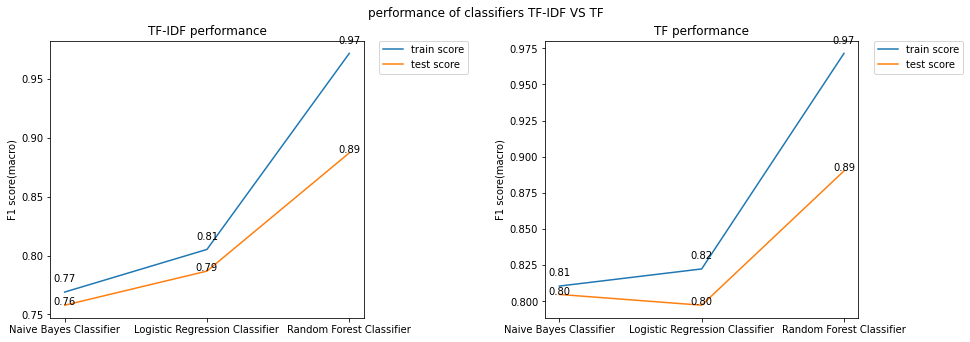

In [61]:
classifier_name=['Naive Bayes Classifier','Logistic Regression Classifier','Random Forest Classifier']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))
fig.suptitle('performance of classifiers TF-IDF VS TF')

ax1.plot(classifier_name,tfidf_train_score,label="train score")
ax1.plot(classifier_name,tfidf_test_score,label="test score")
ax1.set_title('TF-IDF performance')
ax1.set_ylabel('F1 score(macro)')

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax2.plot(classifier_name,tf_train_score,label="train score")
ax2.plot(classifier_name,tf_test_score,label="test score")
ax2.set_title('TF performance')
ax2.set_ylabel('F1 score(macro)')

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


for x,y in zip(classifier_name,tfidf_train_score):

    label = "{:.2f}".format(y)

    ax1.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
    
for x,y in zip(classifier_name,tfidf_test_score):

    label = "{:.2f}".format(y)

    ax1.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,0),
                 ha='center') 


for x,y in zip(classifier_name,tf_train_score):

    label = "{:.2f}".format(y)

    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
    
for x,y in zip(classifier_name,tf_test_score):

    label = "{:.2f}".format(y)

    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,0),
                 ha='center') 

fig.tight_layout(pad=2.5)
plt.show()

## Part 4: Sentiment Analysis

### (a) Use Vader to compute for each post the sentiment of title field

In [62]:
def evalSentences(sentences, to_df=True, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [63]:
titles = data['title'].values
sentiment_DF = evalSentences(titles, to_df=True, columns=['title','vader'])

100%|██████████| 42778/42778 [00:04<00:00, 10422.70it/s]


In [64]:
sentiment_DF['subreddit']=data['subreddit']

In [85]:
# sentiment_DF[sentiment_DF['subreddit']=='pics'].vader

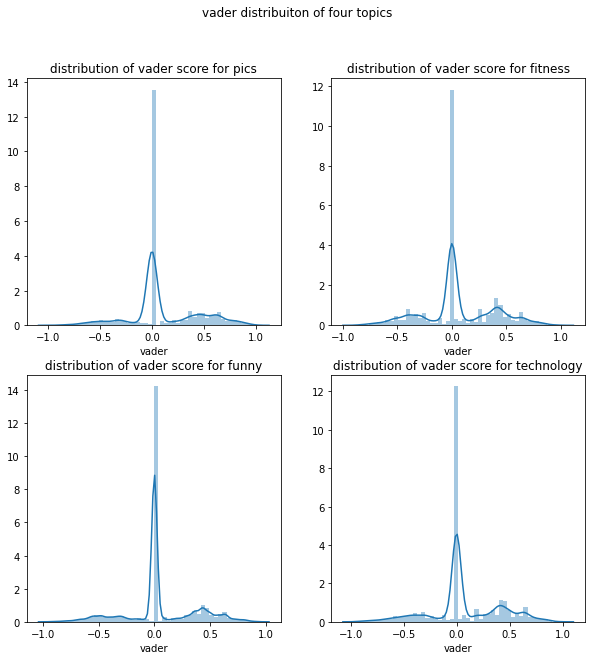

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('vader distribuiton of four topics')
ax1.title.set_text('distribution of vader score for pics')
sns.distplot(sentiment_DF[sentiment_DF['subreddit']=='pics'].vader,ax=ax1,label='pics vader')
ax2.title.set_text('distribution of vader score for fitness')
sns.distplot(sentiment_DF[sentiment_DF['subreddit']=='Fitness'].vader,ax=ax2)
ax3.title.set_text('distribution of vader score for funny')
sns.distplot(sentiment_DF[sentiment_DF['subreddit']=='funny'].vader,ax=ax3)
ax4.title.set_text('distribution of vader score for technology')
sns.distplot(sentiment_DF[sentiment_DF['subreddit']=='technology'].vader,ax=ax4)
plt.gca()

### b) Analyze the distribution of sentiments for each of 4 subreddits 

Answer: Known from the distribution of each topic, we can find there are three obvious waves, and the plot is symmetric. The distribution of sentiments of each topic has almost same trend and shape. The first one is around -0.4, which can be considered to be negative sentiments. Most titles has the peak where the vader score concentrating around 0. The neutral titles has vader score from -0.2 to 0.2. The third peak is aound 0.4-0.5, which can be set as positive sentiments.

### c) Generate clearly positive and clearly negative according to Vader 

Answer: Based on the anaysis of distribution of sentiments. The clearly positive sentiments should be greater than 0.4. The clearly negative sentiments should be smaller than -0.4. Because each distribution of sentiments plot should cover the negative, neutral and positive sentiments at the same time, we can assign the threshold based on the distribution of sentiments. 

#### c.1 Define a threshold and assign a label for each post

In [67]:
 def set_sentiment(df, positive_value, nagetive_value):
    list_sent=[]
    for value in df['vader']:
        if value <=(nagetive_value):
            list_sent.append('negative')
        elif value >=positive_value:
            list_sent.append('positive')
        else:
            list_sent.append('neutral')
    
    sentiment_df=pd.DataFrame(list_sent)
    return sentiment_df


In [68]:
sentiment_DF['sentiments']=set_sentiment(sentiment_DF,0.4,-0.4)

#### c.2 Removing posts that are not clearly negative or positive

In [69]:
sentiment_DF=sentiment_DF[sentiment_DF['sentiments'].isin(['neutral'])==False]


In [70]:
sentiment_DF["title_clean"]=data['title_clean']

In [87]:
sentiment_DF

,title,vader,subreddit,sentiments,title_clean
0,"In 1964, an average wage worker had to clock 8...",0.4404,pics,positive,average wage worker clock hours afford program...
2,My best photo of 2018!,0.6696,pics,positive,best photo
3,Have a happy 2019 you sexy people!,0.8122,pics,positive,happy sexy people
8,Started bee keeping My Favorite 2018 shop of n...,0.7269,pics,positive,started bee keeping favorite shop new friends
10,"No car, no problem",-0.7269,funny,negative,car problem
13,I live in Brighton and this was recently poste...,0.5766,funny,positive,live brighton recently posted cats hanover fac...
14,"After 6 months, I’m glad I went back to shaving!",0.5093,pics,positive,months glad went back shaving
20,"So... ""E!"" You've finally figured out the secr...",0.4926,funny,positive,e finally figured secret formula better ratings
21,My current hypertrophy training split. How to ...,0.4767,Fitness,positive,current hypertrophy training split improved
24,Something tells me my dog doesn’t like her new...,0.5719,funny,positive,something tells dog like new vitamin


### (d). Compute the top words that tend to occur in positive titles and negative titles
There are subreddit-specific patterns for each subreddit, which can be found through calculating the top word and top phrase by using pointwise mutual information. The analysis is presented below.

In this part, the pointwise mutual information is used to find the top words that tend to occur in positive titles and negative titles. First, we need to select the positive and negative titles based on the subreddit topics. After that, the top k words are selected by highest 50 term frequency. Next, I use the binary encoding for the word, if appears in the topic 1, if not 0. At last, the pointwise mutual information(PMI) is calculated for word in positive and negative scenarios. Then, the words are ranked by the PMI score. Pointwise mutual information (PMI) is a correlation measure for two events, x and y. Here, the x is the top word, and y is the sentiments scenario. This method can tell us which word is the most informative and appear frequently in each sentiment. Besides, the top phrase also analyzed by using the same method. The phrase combines the adjective and noun word. Usually, the phrase is more understandable and easy for us to find the subreddit-specific patterns. 

In [72]:
def top_k_words(k, reviewDF,columns,topic):
 
    reviews = reviewDF[reviewDF['subreddit']==topic][columns].values
#     stop_words.add('hotel')
#     stop_words.add('room')
#     stop_words.add('rooms')
#     stop_words.add('stay')
#     stop_words.add('staff')
    counter = Counter()
    for review in reviews:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop_words and len(word) > 2])
        topk = counter.most_common(k)
    return topk

In [73]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

def top_k_phrases(k, reviewDF,columns,topic):
    reviews = reviewDF[reviewDF['subreddit']==topic][columns].values
    counter = Counter()
    for review in reviews:
        # review = ' '.join(x for x in review.split() if x not in stop)
        counter.update(word for word in flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]) if word not in stop_words)
        topk = counter.most_common(k)
    return topk

In [74]:
# Noun Phrase Extraction Support Functions

lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop_words)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [75]:
def dataFrameTransformation(df, topK,mode):
    reviews = df['title_clean'].values
    
    tokenizer = RegexpTokenizer(r'\w+')
    freqReview = []
    if mode == 'word':
        for review in reviews:
            tempCounter = Counter([word.lower() for word in tokenizer.tokenize(review)])
            topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topK]
            freqReview.append(topkinReview)
    elif mode=='phrase':
        grammar = r"""
            NBAR:
                {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
            NP:
                {<NBAR>}
                {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        """
        chunker = nltk.RegexpParser(grammar)
        tagger = PerceptronTagger()
        pos_tag = tagger.tag
        for review in reviews:
            tempCounter = Counter(flatten([word 
                                           for word 
                                           in get_terms(chunker.parse(pos_tag(tokenizer.tokenize(review))))]))
            topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topK]
            freqReview.append(topkinReview)

    freqReviewDf = pd.DataFrame(freqReview)
    freqReviewDf.columns = [c[0] for c in topK]
    finalreviewDf = df.join(freqReviewDf)

    return finalreviewDf

In [76]:
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = (sum(df['sentiments']==i))/(len(df))

            py = (sum(df[x]==j))/(len(df))
            pxy = len(df[(df['sentiments']==i) & (df[x]==j)])/len(df)
            if pxy==0: # Log 0 cannot happen
                if px*py==0:
                    pmi = math.log((pxy+0.0001)/(px*py+0.00001))
                else:
                    pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf



def pmiIndivCal(df, x, gt, label_column='sentiments'):
    px = (sum(df[label_column]==gt))/(len(df))
    py = (sum(df[x]==1))/(len(df))
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0: #Log 0 cannot happen
        if px*py==0:
            pmi = math.log((pxy+0.0001)/(px*py+0.00001))
        else:
            pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='sentiments'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in (topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pd.DataFrame(pmilist)
    pmiposlist = pd.DataFrame(pmiposlist)
    pmineglist = pd.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf




In [77]:
topic_list=['pics','funny','Fitness','technology']#,'funny','Fitness','technology'
pmiposlist=[]
pmineglist=[]
keyword_num=50
for topic in topic_list:
    topk=top_k_words(keyword_num,sentiment_DF,'title_clean',topic)
    df=sentiment_DF[sentiment_DF['subreddit']==topic]
    df=df.reset_index(drop=True)
    finaldf_topk = dataFrameTransformation(df, topk, "word")
    poslist, neglist, pmidf = pmiForAllCal(finaldf_topk,topk)
    pmiposlist.append(poslist)
    pmineglist.append(neglist)
    



In [78]:
word_table=pd.DataFrame()

In [79]:
word_table['word pics pos']=pmiposlist[0][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word pics neg']=pmineglist[0][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word funny pos']=pmiposlist[1][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word funny neg']=pmineglist[1][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word Fitness pos']=pmiposlist[2][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word Fitness neg']=pmineglist[2][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word technology pos']=pmiposlist[3][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
word_table['word technology neg']=pmineglist[3][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()

#### d.1 Pointwise mutual information for word
The table lists the top 10 words with highest PMI score in each subreddit and sentiment. In the first topic,'pics', the positive words include mamzing, beatiful, love, best and favorite. These look like the positive words to decribe the pictures. However, in the negative sentimens, there are old years and last. These word cannot tell us too much information; but it may tell us the last moment and the old time shown in the picture. The negative word in picture seems to complain the time passing so fast. 

In the second topic,'funny', the positive words include thanks, love, best, friends, and lol. The subreddit 'funny' should include many positive words due to its topic 'funny'. The negative words include hell, damn, fuck, wrong and bad, which make senses because these words are negative but related to the topic 'funny'. 

In the third subreddit,'Fitness', the positive words include improve, healthy, routine, and strength, which describe the gain of fitness and become healthy and good. The negative word includes pain, injury, shoulder, back and fat, which describe the hurt of fitness, and worry about fat. We can find these top words all related to the topic 'fitness', and also can show the sentiments.

In the fourth subreddit,'technology', the positive words include best, support, intelligence, help, and free, which describe the positive feeling related to technology. People feel good when they get support, and free stuff from the technology. The negative words includes die, tarife, new, facebook, and huawei. From these negative top words, we can know there are reddit posting talks about the company facebook and huawei, but lots of negative sentiments about these two companies. 

Overall, the top words all related to the subreddit topics. The connent of these top words can indicate which topic it belongs to. But only adjective words can show us the sentiments. Most top words appeard in each subreddit are unique. They only have a few common words. Therefore, there are specific patterns in each subreddit which the noun words describe the thing only related to its subreddit. 

In [80]:
word_table.reset_index(drop=True, inplace=True) 
word_table

,word pics pos,word pics neg,word funny pos,word funny neg,word Fitness pos,word Fitness neg,word technology pos,word technology neg
0,shot,old,true,hell,best,pain,usa,die
1,love,work,thanks,damn,better,injury,better,gibt
2,best,last,love,fuck,improve,bad,number,tarife
3,favorite,found,best,poor,healthy,lose,support,mit
4,amazing,guy,friends,wrong,strength,shoulder,best,für
5,beautiful,today,pretty,shit,like,back,download,euro
6,friends,one,lol,bad,gaining,exercise,free,huawei
7,great,look,interesting,people,progress,fat,technical,news
8,happy,years,nice,guy,good,weight,intelligence,facebook
9,friend,dad,better,dog,routine,advice,help,iphone


In [81]:
sentiment_DF["title_clean"].replace('', np.nan, inplace=True)
sentiment_DF["title_clean"].isnull().value_counts()
sentiment_DF.dropna(subset=['title_clean'],inplace=True)

In [82]:
topic_list=['pics','funny','Fitness','technology']#,'funny','Fitness','technology'
pmiposlist_phrase=[]
pmineglist_phrase=[]
keyword_num=50
for topic in topic_list:
    
    topk=top_k_phrases(keyword_num,sentiment_DF,'title_clean',topic)
    df=sentiment_DF[sentiment_DF['subreddit']==topic]
    df=df.reset_index(drop=True)
    finaldf_topk = dataFrameTransformation(df, topk, "phrase")
    poslist, neglist, pmidf = pmiForAllCal(finaldf_topk,topk)
    pmiposlist_phrase.append(poslist)
    pmineglist_phrase.append(neglist)
    

In [83]:
phrase_table=pd.DataFrame()
phrase_table['phrase pics pos']=pmiposlist_phrase[0][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase pics neg']=pmineglist_phrase[0][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase funny pos']=pmiposlist_phrase[1][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase funny neg']=pmineglist_phrase[1][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase Fitness pos']=pmiposlist_phrase[2][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase Fitness neg']=pmineglist_phrase[2][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase technology pos']=pmiposlist_phrase[3][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()
phrase_table['phrase technology neg']=pmineglist_phrase[3][:].sort_values('pmi',ascending=0).head(10)['word'].tolist()

#### d.2 Pointwise mutual information for phrase

In the subreddit,'pics', the positve phrases generating from positive titles demonstrate the happy moments in the pictures, such as new year, cake day, nice day and friends. The negative phrase includes many disgusting things and people that are shown in pictures. Therefore, there is a 'pics'-specific patterns that the phrase describe the moment, people, things showns in pictures.

In the subreddit, 'funny', the positve phrases present the positive funny things such as good boy, funny thing, cute thing and happy life. The negative phrase show the negative funny thing, like damn time, holi shit and other bad things. The pattern is very clear that the phrases describe the funny things.

In the subreddit, 'fitness', the positive phrases tell us the positive things related to the fitness, like good program, weight muscle, someone help, and good run. The negative phrases tell us the negative things related to the fitness, like chest pain, waste time, and bad posture. No matter the positive phrases or negative phrases, we can tell its sentiment easily and find they all related to fitness.

In the subreddit, 'techonology', the positive phrases includes free tool, instant help, technical support. People posted in reddit to thank the technical support, and free tool help. The negative phrases includes crimin case huawei, curb export and billing phone. We can see people complained about things related to tochnology in reddit. 

Overall, the top phrase all related to the subreddit topics. The connent of these top phrase indicate which topic it belongs to and can also show us the sentiments. Besides, they can tell us what has posted in each subreddit. All top phrase appeard in each subreddit are unique. Therefore, there are specific patterns in each subreddit that the phrese describe the thing only related to its subreddit and also shows the sentiments.



In [84]:
phrase_table.reset_index(drop=True, inplace=True) 
phrase_table

,phrase pics pos,phrase pics neg,phrase funny pos,phrase funny neg,phrase Fitness pos,phrase Fitness neg,phrase technology pos,phrase technology neg
0,happi new year,femal religi polic offic,good boy,damn time,good program,bad postur,router loginhelp,valley fear
1,present word pas,orang man,outstand move,holi shit,finger shoe,chest pain,netgear extend support mywifiext help number,curb export
2,new friend,impala okavango delta botswana oc,nice tri,lot damag,help guy,wast time,instant help,billig telefonieren
3,new year,photo leopard,wise word,face regret,easi meal prep suggest high protein diet,knee pain,download free tool hip,callthrough telefontarif kann man
4,central florida,lo angel,good year,bad boy,weight muscl,knee injuri,need help,reddit com forbidden reddit com
5,photo friend,moment disast,funni thing,bad titl,trainer ufc champion georg,sit up,wholesal compani india,call telefontarif sehr
6,good boi,islam dress code,need help,wait illeg,someon help,moron monday weekli stupid question,discus tech weekli technolog tech support gene...,first step
7,cake day,iranian girl,ye plea,useless braill,moment appreci fart,tip someon,web design compani delhi,fix quickbook
8,nice day,breath crap,felt cute,wanna fuck,thank advanc,skinni fat,technic support number,crimin case huawei
9,white hous,light new inform,happi wife happi life,poor guy,good run,lose weight,support phone number,trade secret
